# Group Name : Vibrator
# Group Members: 
### 1. AIT2304037 Chin Jun Ming 
### 2. AIT2304038 Chin Zheng Dong
### 3. AIT2304041 Tan Wai Hong

# Introduction
##### This project aims to build some models learned from this course using open face images dataset. Once the model is built, we need to use this model to predict age and gender. In this project, we use various matrix operations to complete all tasks.

# Import library
##### For the beginning, we import all the libraries we will use. Next, we will introduce the various libraries we will use. 
##### 1. __Numpy__ is used to perfrom the matrix operations.
##### 2. __Matplotlib__ is used for visualization the images (such as experiment, the image after various matrix operations).
##### 3. __os__ is used to import the dataset.
##### 4. __skimage__ is used to convert the color face images to grayscale images and resize each images to 50 x 50 pixels.
##### 5. __sklearn__ is used to split the dataset and calculate the mean square error after the training and testing is completed.

In [32]:
import numpy as np
from numpy import linalg as LA

from matplotlib import pyplot as plt
from matplotlib import image

import os

from skimage import color 
from skimage.transform import rescale

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Initialization text setting for matplotlib visualization

In [33]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlecolor'] = 'black'

# Import dataset

##### For this part, 
##### 1. __image_datasets__ is the name of our dataset filename, __file_names__ is list out all the images directory. In order to successfully import the dataset, we will use for loop to connect to __FaceData\dataset_directory__. 
##### 2. Then, we have a variable __img__ used to read the each pictures directory. Since the first of each dataset basename is the age and the second underscore is the gender, we seperate them using __os.path.basename(filename).split__ and append them to the list. 
##### 3. After completing this step, we use the __color.rgb2gray__ function to convert the color face images to grayscale images, then using __rescale__ function to resize it to 50x50 pixels and flatten this 50 x 50 pixels image into a one_dimensional(2500) pixel.

In [34]:
image_datasets = "FaceData"
file_names = os.listdir(image_datasets)

faces = []
ages = []
genders = []

for file_name in file_names:
    file_path = os.path.join(image_datasets,file_name)
    img = image.imread(file_path)
    
    ages.append(os.path.basename(file_name).split("_")[0])
    genders.append(os.path.basename(file_name).split("_")[1])
    
    gray_image = color.rgb2gray(img)
    gray_image_rescaled = rescale(gray_image,0.25,anti_aliasing=False)
    
    faces.append(gray_image_rescaled.flatten()) 

# Convert the list to numpy array
##### 1. In this section, we convert the __faces__, __ages__, and __genders__ dataset we just imported into numpy arrays.  
##### 2. During the conversion, we define their types, change the __genders__ data from 0 and 1 to -1 and 1, and normalize the __ages__.

In [35]:
faces2np = np.array(faces).astype(float)
genders2np = np.array(genders).astype(int)*2 -1
ages2np = np.array(ages).astype(float)/100

# Print array shape
##### We print out the dimensions of the data we just converted into a numpy array. So, we can observe that we have 9762 images and the images have been succesfully flattened into a one-dimensional array.

In [36]:
print(faces2np.shape)
print(genders2np.shape)
print(ages2np.shape)

(9762, 2500)
(9762,)
(9762,)


# Visualize the faces
##### We use __matplotlib__ and __numpy__ functions to reshape the 12 images, and we can observe that the images have been succesfully converted to gray images and resized to 50 x 50 pixels

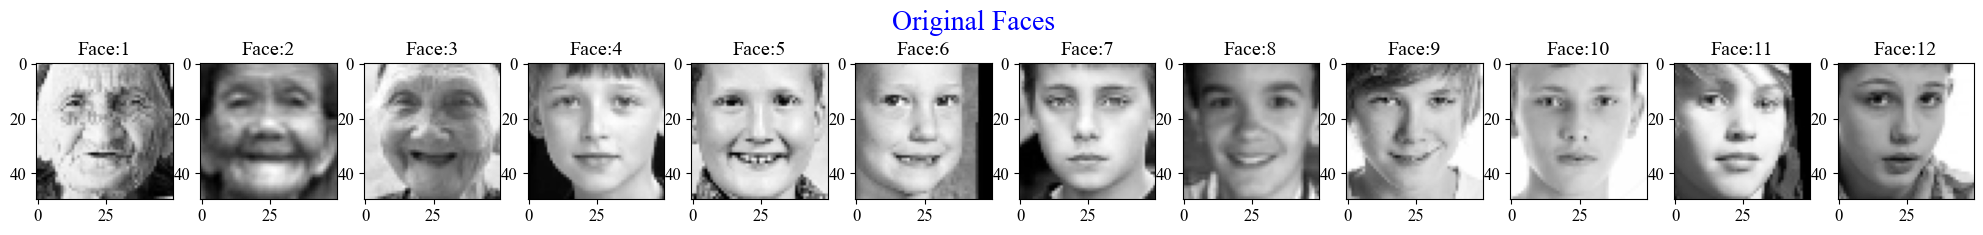

In [37]:
row0 = 12
fig, ax = plt.subplots(1,row0,figsize=(25,2.5))

for i in range(row0):
    ori_im = faces2np[i,:].reshape((50, 50))
    ax[i].imshow(ori_im, cmap='gray')
    ax[i].set_title(f"Face:{i + 1}")
    ax[i].axis('on')

plt.suptitle("Original Faces",fontname='TImes New Roman',color='blue',fontsize=20)
plt.show()

# Split the dataset

##### We use __train_test_split__ split the faces dataset, gender dataset and age dataset into training set and testing set, with the training set accounting for 90% and the testing set accounting for 10%.

In [38]:
X_train, X_test, y_genders_train, y_genders_test, y_ages_train, y_ages_test = train_test_split(faces2np,genders2np,ages2np, test_size=0.1, random_state=205)

# Demean faces training dataset

##### We use the following formula to calculate the faces training set and testing set demean value.

\begin{align}
{X{train}}_{demean} = X{train}- \frac{\sum_{n=1}^{i} X{train}^{(i)}}{n}
\end{align}

##### where 
##### 1. $X{train}$ is your training dataset
##### 2. $\sum_{n=1}^{i} X{train}^{(i)}$ is the sum between each columns
##### 3. $n$ is the number of samples in each column

In [39]:
X_train_1 = X_train.copy()
X_train_demean = X_train_1 - np.mean(X_train_1,axis=0)

X_test_demean = X_test - np.mean(X_test, axis=0)

# Visualize the demean faces
##### This part we visualize 12 images that have been demean. Compared to original image, the demean images are darker.

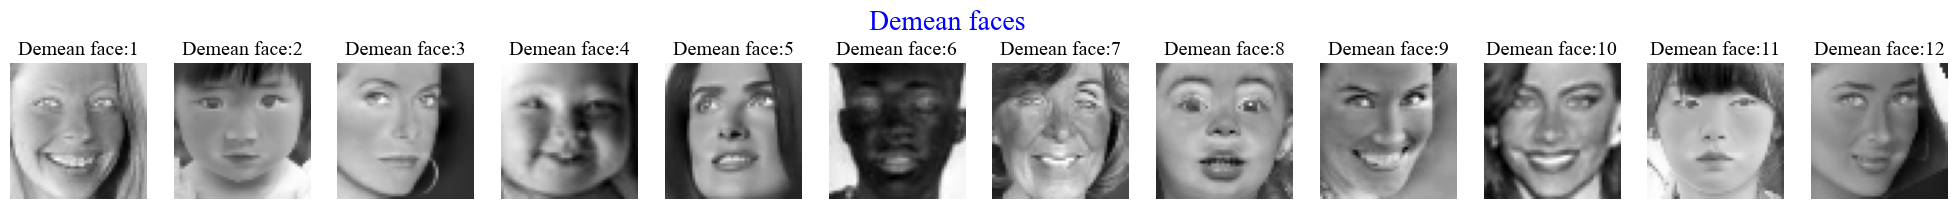

In [40]:
row0 = 12
fig, ax = plt.subplots(1,row0,figsize=(25,2.5))

for i in range(row0):
    demean_im = X_train_demean[i,:].reshape((50, 50))
    ax[i].imshow(demean_im, cmap='gray')
    ax[i].set_title(f"Demean face:{i + 1}")
    ax[i].axis('off')

plt.suptitle("Demean faces", fontname='TImes New Roman',color='blue',fontsize=20)
plt.show()

# Covariance Matrix

##### We use the following formula to calculate the faces training set covariance matrix:

\begin{align}
{X{train}}_{cov} = \frac{{X{train}}_{demean}^{T}{X{train}}_{demean}}{n}
\end{align}

##### where
##### 1. $X{train}_{demean}$ is the matrix after demean the previous training dataset 


In [41]:
X_train_cov = (X_train_demean.T@X_train_demean)/X_train_demean.shape[0]

# Visualize the covariance faces
##### We visualize 12 images after calculating the covariance matrix.

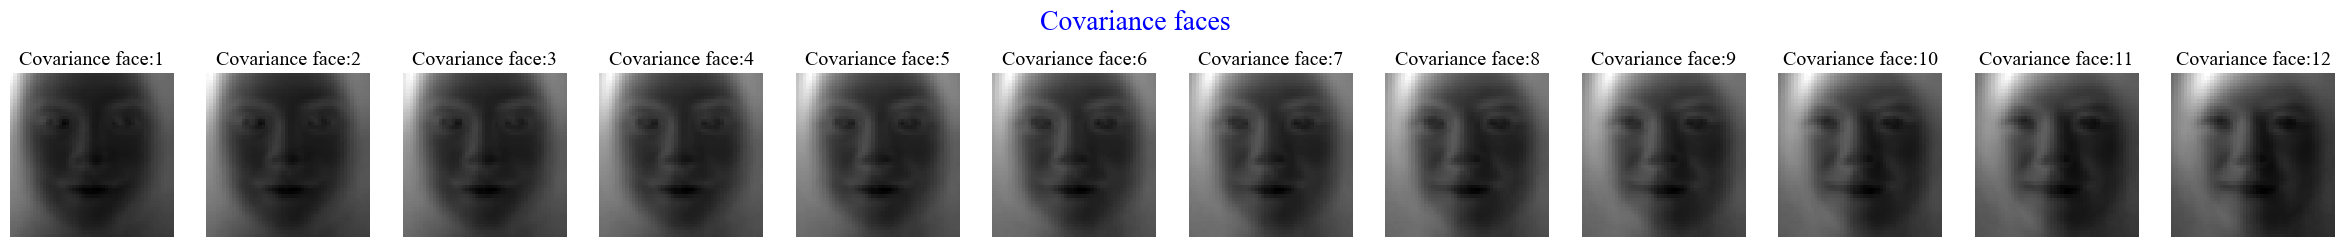

In [42]:
row0 = 12
fig, ax = plt.subplots(1,row0,figsize=(30,3))

for i in range(row0):
    cov_im = X_train_cov[:,i].reshape((50, 50))
    ax[i].imshow(cov_im, cmap='gray')
    ax[i].set_title(f"Covariance face:{i + 1}")
    ax[i].axis('off')

plt.suptitle("Covariance faces", fontname='TImes New Roman',color='blue',fontsize=20)
plt.show()

# Eigendecomposition

##### After calculating the covariance matrix, we use the __numpy.linalg.eig__ function to perform Eigendecomposition on $X{train}_{cov}$.

In [43]:
X_train_eigenvalue, X_train_eigenvector = LA.eig(X_train_cov.copy())

# Eigendecomposition Result
##### After performing the Eigendecomposition, we get 2 results, the first is __X_train_eigenvalue__ and the second is __X_train_eigenvector__. We will also discuss its properties later.

In [44]:
print(f"X train eigenvalue: {X_train_eigenvalue}")
print(f"X train eigenvector: {X_train_eigenvector}")

print(f"X train eigenvalue shape: {X_train_eigenvalue.shape}")
print(f"X train eigenvector shape: {X_train_eigenvector.shape} ")

X train eigenvalue: [3.40378176e+01 1.37234326e+01 1.29175653e+01 ... 1.26367062e-04
 1.24778007e-04 1.24649300e-04]
X train eigenvector: [[ 0.02109512 -0.02077792 -0.00991848 ...  0.00169655 -0.00056453
  -0.00071347]
 [ 0.02177545 -0.02188654 -0.0084613  ...  0.01037992 -0.00464907
   0.00195174]
 [ 0.02246644 -0.02277959 -0.00668609 ... -0.00893985  0.00129503
  -0.00428021]
 ...
 [ 0.02612337  0.0031382  -0.03196089 ... -0.00372005 -0.00047456
   0.00123431]
 [ 0.02603965  0.00223539 -0.03199755 ...  0.00187301  0.00358722
   0.00304918]
 [ 0.02603488  0.00118285 -0.03185448 ... -0.00311391 -0.00256184
  -0.00075791]]
X train eigenvalue shape: (2500,)
X train eigenvector shape: (2500, 2500) 


# Visualize Eigendecomposition faces

##### In this section, we visualized a total of 24 images after Eigendecomposition. In this visualization, we select the first 12 and ranged from (0 to 11) * 50 vectors and reshaped them into 50 x 50 eigenfaces from the eigenvectors.

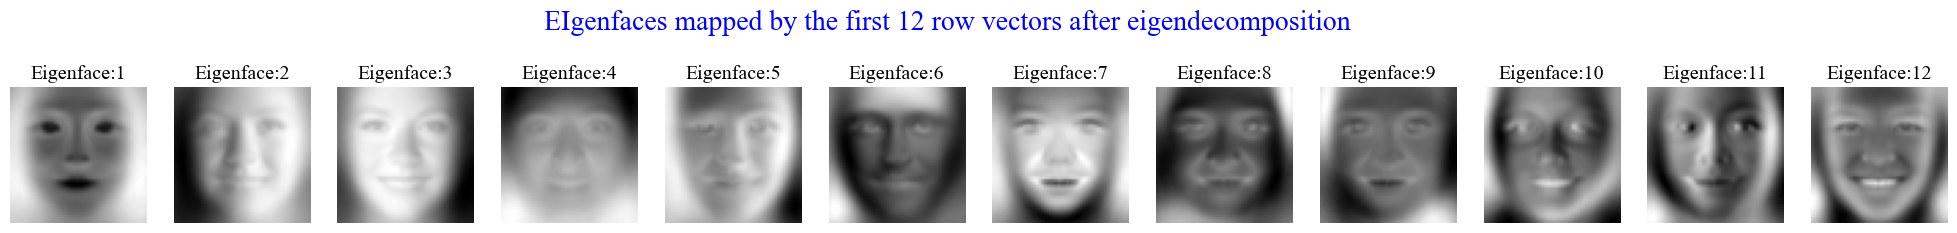

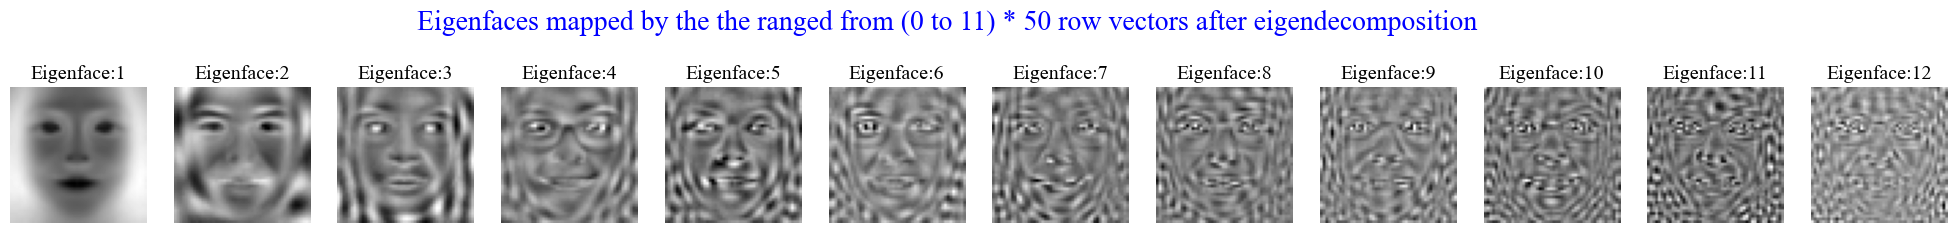

In [45]:
row0 = 12
fig, ax = plt.subplots(1,row0,figsize=(25,3))

for i in range(row0):
    eig_im = X_train_eigenvector[:,i].reshape((50, 50))
    ax[i].imshow(eig_im, cmap='gray')
    ax[i].set_title(f"Eigenface:{i + 1}")
    ax[i].axis('off')

plt.suptitle("EIgenfaces mapped by the first 12 row vectors after eigendecomposition",fontname='TImes New Roman',color='blue',fontsize=20)
plt.show()

row0 = 12
fig, ax = plt.subplots(1,row0,figsize=(25,3))

for i in range(row0):
    eig_im = X_train_eigenvector[:,i*50].reshape((50, 50))
    ax[i].imshow(eig_im, cmap='gray')
    ax[i].set_title(f"Eigenface:{i + 1}")
    ax[i].axis('off')

plt.suptitle("Eigenfaces mapped by the the ranged from (0 to 11) * 50 row vectors after eigendecomposition",fontname='TImes New Roman',color='blue',fontsize=20)
plt.show()

# SVD

##### In this section, we use the numpy built-in function __np.linalg.svd__ to perfrom Singular Value Decomposition on the faces training set.

In [46]:
X_train_SVD = X_train.copy()

U_X_train_SVD, sigma_X_train_SVD, VT_X_train_SVD = LA.svd(X_train_SVD)

# SVD Result

##### After we perform SVD, we can observe that the __Xtrain__ matrix is decomposed into the following 3 matrices:

\begin{align}
{X{train}} = U_{X{train}} Σ_{X{train}} V^T_{X_{train}}
\end{align}

##### where U is left singular vectors, $V^T$ is the tranpose of the right singular vector, $Σ$ is singular values. U and V become an orthogonal matrix. After decomposition, U becomes an n x n square matrix, Σ has only singular values, and VT is a d x d square matrix. We will also discuss it properties later.

In [47]:
print(U_X_train_SVD.shape)
print(sigma_X_train_SVD.shape)
print(VT_X_train_SVD.shape)

print(U_X_train_SVD)
print("-------------------------------------------")
print(sigma_X_train_SVD)
print("-------------------------------------------")
print(VT_X_train_SVD)

(8785, 8785)
(2500,)
(2500, 2500)
[[-1.05905195e-02 -4.69653736e-03 -1.82185587e-02 ... -1.99846021e-03
  -6.27781564e-03  3.51542382e-04]
 [-1.01012158e-02 -5.23484187e-03  6.39077191e-03 ...  8.04656034e-03
   1.58809301e-02 -6.47218206e-03]
 [-1.00407971e-02  1.08369331e-02 -3.69015208e-02 ...  2.47741453e-03
   1.34007780e-02 -1.14872323e-02]
 ...
 [-9.38541913e-03  1.07405059e-03 -3.47327890e-03 ...  6.75074724e-01
   4.88216752e-03  5.02551837e-03]
 [-1.27260183e-02 -8.06838148e-03  5.11775289e-03 ...  4.07294258e-03
   5.52777244e-01 -7.39661767e-03]
 [-4.79922367e-03  7.82081862e-03 -2.08010338e-03 ... -3.16832737e-03
   9.50145044e-03  3.40407645e-01]]
-------------------------------------------
[2.49812857e+03 3.74784090e+02 3.45224670e+02 ... 4.08750377e-01
 3.95556844e-01 3.85348485e-01]
-------------------------------------------
[[-0.01462816 -0.01437478 -0.01435444 ... -0.01714029 -0.01717306
  -0.01720271]
 [-0.02511274 -0.0253627  -0.02519905 ... -0.03184237 -0.0321386

# SVD faces visualize

##### Here we still visualize a total of 24 images using SVD. The eigenfaces after SVD decomposition are $V^T$, so we directly select the $V^T$ column to reshape into eigenfaces. As with the eigendecomposition above, we also select the the first 12 and ranged from (0 to 11) * 50 vectors and reshaped them into 50 x 50 eigenfaces from the $V^T$.

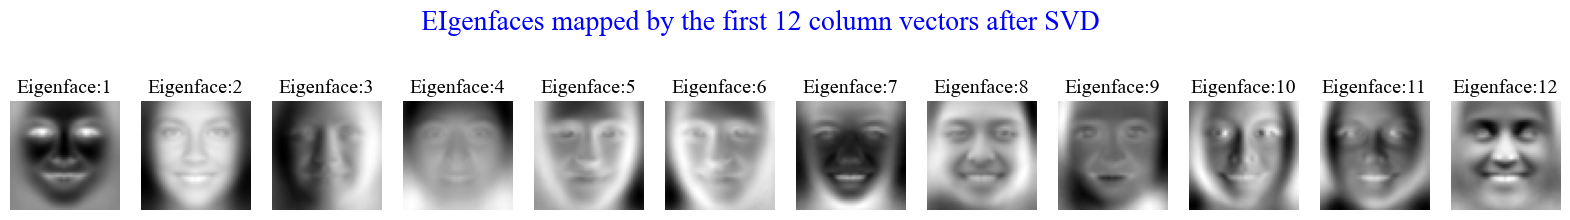

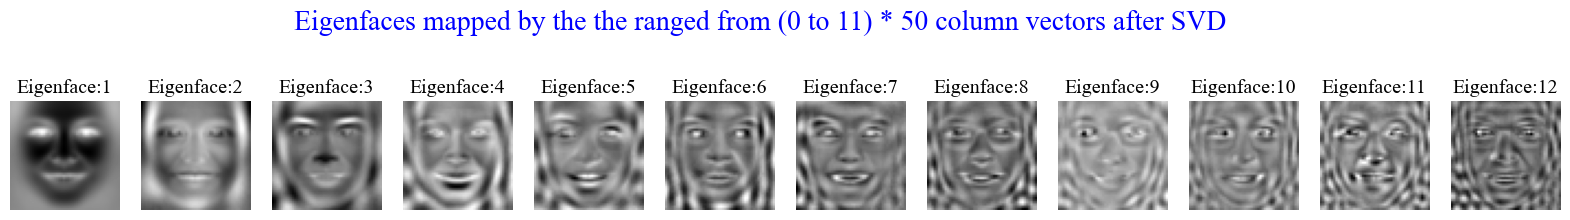

In [48]:
row = 12
fig,ax = plt.subplots(1,row,figsize=(20,3))

for i in range(row):
    eigenface = VT_X_train_SVD[i,:].reshape((50,50))
    ax[i].imshow(eigenface,cmap='gray')
    ax[i].set_title(f"Eigenface:{i + 1}")
    ax[i].axis('off')

plt.suptitle("EIgenfaces mapped by the first 12 column vectors after SVD",fontname='TImes New Roman',color='blue',fontsize=20)
plt.show()

row1 = 12
fig,ax = plt.subplots(1,row,figsize=(20,3))

for i in range(row1):
    eigenface = VT_X_train_SVD[i*20,:].reshape((50,50))
    ax[i].imshow(eigenface,cmap='gray')
    ax[i].set_title(f"Eigenface:{i + 1}")
    ax[i].axis('off')

plt.suptitle("Eigenfaces mapped by the the ranged from (0 to 11) * 50 column vectors after SVD",fontname='TImes New Roman',color='blue',fontsize=20)
plt.show()

# Dicussion: Perform Eigenfaces analysis using Eigendecomposition and SVD - Similarities and differences

## Similarities Eigendecomposition and SVD:
##### 1. Both methods basically decompose the matrix and produce orthogonal eigenfaces
##### 2. The decomposed matrix have the property of orthogonality.
##### 3. They both capture the principal directions of variation in the data.
##### 4. The results are typically very similar for the primary eigenfaces.


### Differences Eigendecomposition and SVD:
##### 1. Memory usage: Eigendecomposition requires explicit computation of the covariance matrix, which may require more memory.
##### 2. The results are very different for the non-primary eigenfaces.

________________________________________

# Predict Model
##### In this section, we will develop models: Linear Regression and Tikhonov Regularization. Both models will be trained using the $X{train}$ dataset and evaluated using the $X{test}$ dataset. 

# Bias Term
##### This function is used to add a bias term to the last column. 

In [18]:
def bias_matrix(dataset):
    biases = np.ones((dataset.shape[0],1))
    dataset = np.hstack((dataset,biases))
    return dataset

# Model - Linear Regression

##### The model is packaged with function and is used to predict the age and the gender. The weight $W$ is calculated using the following formula:

\begin{align}
W = (X_{train}^T X_{train})^{-1} X^T_{train} Y_{train}
\end{align}


In [19]:
def linear_regression(X_train,y_train):
    X_train = bias_matrix(X_train)
    W = (LA.inv(X_train.T @ X_train)) @ X_train.T @ y_train
    return W

# Model - Tikhonov Regularization

##### The model is also packaged with function and also used to predict the age and the gender, but this time it includes a regularization parameter λ, and our task to find the optimal parameter. The weight $W$ is calculated using the following formula:

\begin{align}
W = (X_{train}^T X_{train} + λI)^{-1} X^T_{train} Y_{train}
\end{align}


In [20]:
def Tikhonov_regularization(X_train,y_train,L): 
    biases = np.ones((X_train.shape[0],1))
    X_train = np.hstack((X_train,biases))
    W = (LA.inv((X_train.T @ X_train) + L* np.eye(X_train.shape[1])) @ X_train.T @ y_train)
    return W

# Reshape function
##### After matrix is processed by some operations, sometime its dimensions will disappear, so we create a function to reshape the matrix so that one dimension is still there

In [21]:
def one_dimensional_matrix_reshape(dataset):
    dataset_reshape = dataset.reshape((dataset.shape[0],1))
    return dataset_reshape

______

# Predicting Age based on Linear Regression Model
##### To predict the age of the testing dataset, we perform the following steps:

##### 1. First, we use ${X_{train}}$ and $Y{train}_{age}$ to train the linear regression model, and calculate the weight $W_{age}$ using the following formula:

\begin{align}
W_{age} = (X_{train}^T X_{train})^{-1} X^T_{train} Y{train}_{age}
\end{align}

##### 2. Second, after obtaining the weight $W_{age}$, we can use it to predict the testing dataset $X_{test}$ age. Use the following formula to calculate the predicted age $Y{predict}_{age}$:

\begin{align}
Y{predict}_{age} = X_{test} W_{age}
\end{align}


In [22]:
W_age_LR = linear_regression(X_train,y_ages_train) 
y_ages_predict_LR = (bias_matrix(X_test)) @ (one_dimensional_matrix_reshape(W_age_LR))

# The result of predicting age based on Linear Regression

##### Here, we visualize 10 predicted images. 

Text(0.5, 0.98, 'The face images predict ages based on Linear Regression')

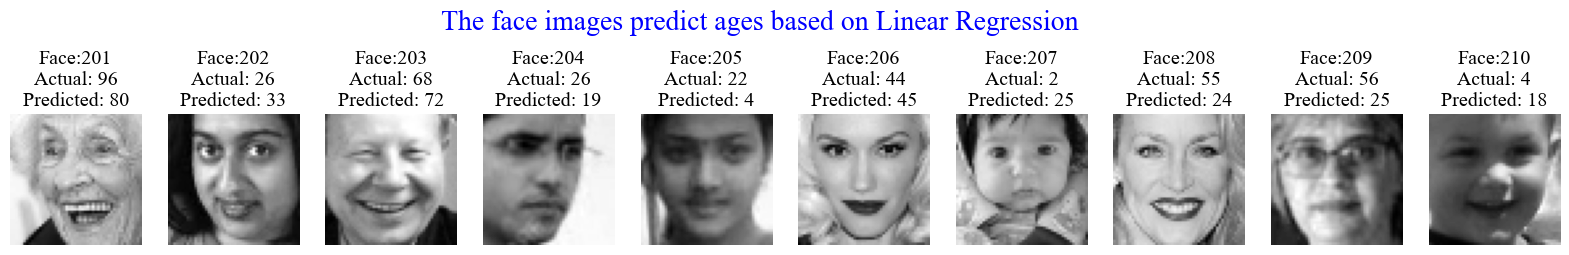

In [23]:
row = 10
offset = 200
fig, ax = plt.subplots(1, row, figsize=(20,3.5))

for i in range(offset, row + offset):
    eigenface = X_test[i, :].reshape((50, 50))
    ax[i - offset].imshow(eigenface, cmap='gray')
    ax[i - offset].set_title(f"Face:{i+1}\nActual: {int(y_ages_test[i] * 100)}\nPredicted: {round(y_ages_predict_LR[i, 0] * 100)}")
    ax[i - offset].axis('off')

plt.suptitle("The face images predict ages based on Linear Regression",fontname='TImes New Roman',color='blue',fontsize=20)


# Conclusion: MSE of age prediction based on Linear Regression

##### Here we use MSE to calculate the average squared difference between the predicted value ($Y{predict}_{age}$) and actual value($Y{train}_{age}$). But here we use the scikit-learn function __mean_squared_error__ to calculate. From the result we get the mean square error result is 0.0314, but before that we have divided the whole age by 100, so according to the returned result we need to multiply it by $100^2$ (because the MSE has $^2$ part), so the MSE is $314.26$. We use $ 314.26 $ for square root, so $ \sqrt{314.26} \approx 17.7 $. It means that the average predicted age of each person differs by $17.73$ years.

In [24]:
before_age = mean_squared_error(y_ages_test, y_ages_predict_LR)
print(f"Mean Squared Error: {mean_squared_error(y_ages_test, y_ages_predict_LR)}")
print(f"average difference between predicted age and actual age: {np.sqrt(mean_squared_error(y_ages_test, y_ages_predict_LR)) * 100}")

Mean Squared Error: 0.03142594859458522
average difference between predicted age and actual age: 17.727365454174294


# Predicting Gender based on Linear Regression Model
##### To predict the gender of the testing dataset, we perform the following steps:

##### 1. First, we use ${X_{train}}$ and $Y{train}_{gender}$ to train the linear regression model, and calculate the weight $W_{gender}$ using the following formula:

\begin{align}
W_{gender} = (X_{train}^T X_{train})^{-1} X_{train} Y{train}_{gender}
\end{align}

##### 2. Second, after obtaining the weight $W_{gender}$, we can use it to predict the testing dataset $X_{test}$ gender. Use the following formula to calculate the predicted gender $Y{predict}_{gender}$:

\begin{align}
Y{predict}_{gender} = X_{test} W_{gender}
\end{align}


In [25]:
W_genders_LR = linear_regression(X_train,y_genders_train) 
y_genders_predict_LR = bias_matrix(X_test) @ one_dimensional_matrix_reshape(W_genders_LR)

# The result of predicting gender based on Linear Regression

##### We still visualize 10 predicted images. Since Linear Regression predicts a continuous value, we classify value $＜ 0$ as male and value $\ge 0$ as female.

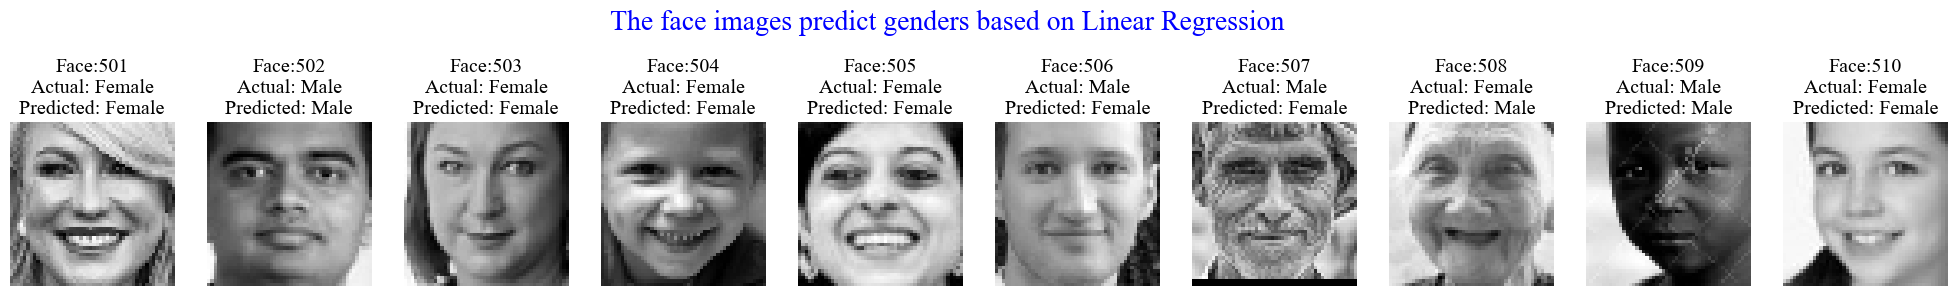

In [26]:
row = 10
offset = 500
fig, ax = plt.subplots(1, row, figsize=(25, 4))

for i in range(offset, row + offset):
    eigenface = X_test[i, :].reshape((50, 50))
    ax[i - offset].imshow(eigenface, cmap='gray')
    actual_gender = 'Male' if y_genders_test[i] < 0 else 'Female'
    predicted_gender = 'Male' if y_genders_predict_LR[i, 0] < 0 else 'Female'
    ax[i - offset].set_title(f"Face:{i+1}\nActual: {actual_gender}\nPredicted: {predicted_gender}")
    ax[i - offset].axis('off')

plt.suptitle("The face images predict genders based on Linear Regression",fontname='TImes New Roman',color='blue',fontsize=20)
plt.show()

 # Conclusion: Accuracy of predict age based on Linear Regression
##### Here, we count the number of people who predicted correctly and use the following formula to calculate accuracy.

\begin{align}
Accuracy = \frac{the\ number\ of\ people\ who\ predicted\ correctly}{the\ total\ number\ of\ people\ predicted}
\end{align}

# <font color=red>你这边report修改一下,然后注明这个function如何使用 </font>

In [ ]:
def get_gender_prediction_accuracy(a, b): 
    return np.mean(np.sign(b.T)[0] == a)

In [27]:
before_gender = get_gender_prediction_accuracy(y_genders_test, y_genders_predict_LR)
print(f"percentage of correctly predicted genders: {before_gender}")

percentage of correctly predicted genders: 0.7543500511770727


______

# Finding the best Tikhonov Regularization parameter λ (age)

##### 1. To get the best parameters, we use $10^n$ for exploration, where n ranges from -10 to 9 (the parameter value will loop: $10^{-10}$, $10^{-9}$, …, until $10^9$).
##### 2. We use the following formula to calculate  $W_{age}$ and $Y{predict}_{age}$:

\begin{align}
W_{age} = (X_{train}^T X_{train} + λI)^{-1} X_{train} Y{train}_{age}
\end{align}

\begin{align}
Y{predict}_{age} = X_{test} W_{age}
\end{align}

##### 3. After calculation, we minimize MSE and loss function respectively, and get the optimal parameters by minimizing them.
##### 4. Every time after calculate the MSE and loss function, we append their current parameter value and the currently value in their respective lists.
##### 5. Repeat steps 2-4 until looping ends.
##### 6. After the looping ends, we use the min function to find the minimum their value. 
##### 7. After that, we use their respective minimum values ​​to find the index where the best parameter is.

In [ ]:
# Tikhonov Regularization loss function
def loss_function(D, W, y_bar, lamda):
    return 1 / 2 * np.dot((D @ W) - y_bar, (D @ W) - y_bar) + lamda / 2 * np.dot(W, W)

def get_conciseness(W):
    return 1 / 2 * np.dot(W, W)

In [ ]:
MSE_data_ages_exp = []
param_data_ages_exp = []
loss_array = []
conciseness_array =[]

for i in range(-10,10):
        param = 10 ** i
        W_TR = Tikhonov_regularization(X_train, y_ages_train, param)
        y_ages_predict_TR = bias_matrix(X_test) @ one_dimensional_matrix_reshape(W_TR)
        MSE = np.round(mean_squared_error(y_ages_test, y_ages_predict_TR), 3)
        loss = np.round(loss_function(bias_matrix(X_test), W_TR, y_ages_test, param), 3)
        conciseness = get_conciseness(W_TR)

        print(f"when lambda is {param}, MSE is {MSE}, loss function is {loss}, conciseness is {conciseness}")
        MSE_data_ages_exp.append(MSE)
        param_data_ages_exp.append(param)
        loss_array.append(loss)
        conciseness_array.append(conciseness)
        
min_MSE_ages_exp = min(MSE_data_ages_exp)
best_param_ages_TR = param_data_ages_exp[MSE_data_ages_exp.index(min_MSE_ages_exp)]

print(f"For the experiment of Tikhonov Regularization predict ages, the optimal λ value is {best_param_ages_TR}, where MSE value is {min_MSE_ages_exp}, loss function is {loss}")

In [ ]:
# loss function 放这里，可以的话做分析

# Visualize the results
##### Here we have made two analysis graphs: the relationship between MSE and λ, the relationship between Loss Function and λ.

## <font color = blue>我有3个小要求，一：图分开做，像我上面那样，不要粘在一起，很乱。2：图的文字标注好，标题也像我那样 3： 记得完善这里的句子，你就大概说明一下这结果如何. Note: 记得把the best result设为variable带进Tikhonow Regularization 做预测那边, Age 这里可以随便一点，你要用loss 或者 MSE都可以，但gender那边要做accuracy </font>
文字标题: plt.suptitle("The face images predict genders based on Linear Regression",fontname='TImes New Roman',color='blue',fontsize=20)
#

In [ ]:
plt.figure(figsize=(10, 17))

ax1 = plt.subplot(3, 1, 1)

plt.plot(param_data_ages_exp, MSE_data_ages_exp, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Regularization Parameter (log scale)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Regularization Parameter for Tikhonov Regularization')
plt.grid(True)
plt.axvline(x=best_param_ages_TR, color='r', linestyle='--', label=f'Optimal λ = {best_param_ages_TR}')
plt.legend()

ax2 = plt.subplot(3, 1, 2)

plt.plot(param_data_ages_exp, loss_array, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Regularization Parameter (log scale)')
plt.ylabel('loss function')
plt.grid(True)
plt.legend()

ax3 = plt.subplot(3, 1, 3)

plt.plot(param_data_ages_exp, conciseness_array, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Regularization Parameter (log scale)')
plt.ylabel('conciseness')
plt.grid(True)
plt.legend()

plt.show()

# <font color=blue>这边code分开，然后重新做过，report我先帮你写好，然后你要检查这里的report，做完code了就检查这项的report。然后把这里的code shell line删掉 </font>

___

# Predicting Age based on Tikhonov Regularization Model
##### This time we used the optimal $\lambda$ that we had found for training.

In [ ]:
W_ages_TR = Tikhonov_regularization(X_train,y_ages_train,best_param_ages_TR)
y_ages_predict_TR = (bias_matrix(X_test)) @ (one_dimensional_matrix_reshape(W_ages_TR))

# Visualize the result of predict age based on Tikhonov Regularization

In [ ]:
row = 10
offset = 620
fig, ax = plt.subplots(1, row, figsize=(30,4))

for i in range(offset, row + offset):
    eigenface = X_test[i, :].reshape((50, 50))
    ax[i - offset].imshow(eigenface, cmap='gray')
    ax[i - offset].set_title(f"Face:{i+1}\nActual: {int(y_ages_test[i] * 100)}\nPredicted: {round(y_ages_predict_TR[i, 0] * 100)}")
    ax[i - offset].axis('off')

plt.suptitle("The face images predict ages based on Tikhonov Regularization",fontname='TImes New Roman',color='blue',fontsize=20)

# Conclusion: MSE of age prediction based on Tikhonov Regularization
##### From the result we get the mean square error result is 0.0232. We use $ 232.92 $ for square root, so $ \sqrt{232.92} \approx 15.26 $. It means that the average predicted age of each person differs by $15.26$ years.

In [ ]:
after_age = mean_squared_error(y_ages_test, y_ages_predict_TR)
print(f"Mean Squared Error: {after_age}")
print(f"average difference between predicted age and actual age: {np.sqrt(after_age) * 100}")

# Finding the best Tikhonov Regularization parameter λ (Gender)

##### 1. To get the best parameters, we use $10^n$ for exploration, where n ranges from -10 to 9 (the parameter value will loop: $10^{-10}$, $10^{-9}$, …, until $10^9$).
##### 2. We use the following formula to calculate  $W_{gender}$ and $Y{predict}_{gender}$:

\begin{align}
W_{gender} = (X_{train}^T X_{train} + λI)^{-1} X_{train} Y{train}_{gender}
\end{align}

\begin{align}
Y{predict}_{gender} = X_{test} W_{gender}
\end{align}

##### 3. After calculation, we minimize MSE and loss function respectively, and get the optimal parameters by minimizing them, and calculate which one of them has better accuracy.
##### 4. Every time after calculate the MSE and loss function, we append their current parameter value and the currently value in their respective lists.
##### 5. Repeat steps 2-4 until looping ends.
##### 6. After the looping ends, we use the min function to find the minimum their value. 
##### 7. After that, we use their respective minimum values ​​to find the index where the best parameter is.

In [ ]:
MSE_data_genders_exp = []
param_data_genders_exp = []
loss_array = []
conciseness_array =[]

for i in range(-10,10):
        param1 = 10 ** i
        W_TR = Tikhonov_regularization(X_train, y_genders_train, param1)
        y_genders_predict_TR = bias_matrix(X_test) @ one_dimensional_matrix_reshape(W_TR)
        MSE = np.round(mean_squared_error(y_genders_test, y_genders_predict_TR), 3)
        loss = np.round(loss_function(bias_matrix(X_test), W_TR, y_genders_test, param1), 3)
        conciseness = get_conciseness(W_TR)

        print(f"when lambda is {param1}, MSE is {MSE}, loss function is {loss}, conciseness is {conciseness}")
        MSE_data_genders_exp.append(MSE)
        param_data_genders_exp.append(param1)
        loss_array.append(loss)
        conciseness_array.append(conciseness)
        
min_MSE_genders_exp = min(MSE_data_genders_exp)
best_param_genders_TR = param_data_genders_exp[MSE_data_genders_exp.index(min_MSE_genders_exp)]
W_genders_TR = Tikhonov_regularization(X_train,y_genders_train,best_param_genders_TR)
y_genders_predict_TR = (bias_matrix(X_test)) @ (one_dimensional_matrix_reshape(W_genders_TR))

print(f"For the experiment of Tikhonov Regularization predict ages, the optimal λ value is {best_param_genders_TR}, where MSE value is {min_MSE_genders_exp}, loss function is {loss}")

# Visualization the results 
Here we have made three analysis graphs: the relationship between MSE and λ, the relationship between Loss Function and λ, and the accuracy comparison graph. 

### 完善,跟age那边的要求一样

In [ ]:
plt.figure(figsize=(10, 17))

ax1 = plt.subplot(3, 1, 1)

plt.plot(param_data_genders_exp, MSE_data_genders_exp, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Regularization Parameter (log scale)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Regularization Parameter for Tikhonov Regularization')
plt.grid(True)
plt.axvline(x=best_param_genders_TR, color='r', linestyle='--', label=f'Optimal λ = {best_param_genders_TR}')
plt.legend()

ax2 = plt.subplot(3, 1, 2)

plt.plot(param_data_genders_exp, loss_array, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Regularization Parameter (log scale)')
plt.ylabel('loss function')
plt.grid(True)
plt.legend()

ax3 = plt.subplot(3, 1, 3)

plt.plot(param_data_genders_exp, conciseness_array, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Regularization Parameter (log scale)')
plt.ylabel('conciseness')
plt.grid(True)
plt.legend()

plt.show()

# <font color=blue>要修改的地方是这里Gender的, remember delete line </font>

____

# Predicting Gender based on Tikhonov Regularization Model 
##### We used the optimal $\lambda$ that we had found for training.

In [ ]:
W_genders_TR = Tikhonov_regularization(X_train,y_genders_train,best_param_genders_TR)
y_genders_predict_TR = (bias_matrix(X_test)) @ (one_dimensional_matrix_reshape(W_genders_TR))

# Visualize the result of predict gender based on Tikhonov Regularization

In [ ]:
row = 12
offset = 200
fig, ax = plt.subplots(1, row, figsize=(30, 4))

for i in range(offset, row + offset):
    eigenface = X_test[i, :].reshape((50, 50))
    ax[i - offset].imshow(eigenface, cmap='gray')
    actual_gender = 'Male' if y_genders_test[i] < 0 else 'Female'
    predicted_gender = 'Male' if y_genders_predict_TR[i, 0] < 0 else 'Female'
    ax[i - offset].set_title(f"Face:{i+1}\nActual: {actual_gender}\nPredicted: {predicted_gender}")
    ax[i - offset].axis('off')

plt.suptitle("The face images predict genders based on Tikhonov Regularization",fontname='TImes New Roman',color='blue',fontsize=20)

# Accuracy of predict gender based on Tikhonov Regularization

##### Here, we also count the number of people who predicted correctly and use the following formula to calculate accuracy.

\begin{align}
Accuracy = \frac{the\ number\ of\ people\ who\ predicted\ correctly}{the\ total\ number\ of\ people\ predicted} * (100\%)
\end{align}

# <font color=blue> 这里一样要修改report</font>

In [ ]:
after_gender = get_gender_prediction_accuracy(y_genders_test, y_genders_predict_TR)
print(f"percentage of correctly predicted genders: {after_gender}")

# Analysis:

### Based on the results, it is clear how Tikhonov Regularization can increase the test accuracy for linear regression

In [ ]:
print(f"MSE of age prediction before and after Tikhonov Regularization:\nbefore: {before_age}\nafter: {after_age}\n")
print(f"accuracy of gender prediction before and after Tikhonov Regularization:\nbefore: {before_gender}\nafter: {after_gender}")

____

# SVD processed feature

##### Here we perform dimensionality reduction and whitening on the dataset according to the steps.
##### 1. We use the demeaned training set to perform SVD as:

\begin{align}

X{train}_{demean} = Q_{X{train}_{demean}} σ_{X{train}_{demean}} P^T_{X{train}_{demean}}

\end{align}

##### 2. We use the following formula to calculate the square root of the eigenvalue:

\begin{align}

\lambda_r =  \frac{{σ^{2}}^{(r)}_{X{train}_{demean}}}{n} \Rightarrow  \sqrt \lambda_r = \frac{σ^{(r)}_{X{train}_{demean}}}{\sqrt{n}}
\end{align}

##### 3. We select $k$ values and use it to calculate the $X{train}_{whitten}$ : 

\begin{align}

X{train}_{whitten} = X{train}_{demean} P[:,:k] (\sqrt{\lambda}_{kk})^{-1} P^T[:k,:]
\end{align}

##### where P is right singular vectors, $\sqrt{λ}_{kk}$ is the square root of the eigenvalue are placed into a diagonal matrix.

In [50]:
Q, s, PT = np.linalg.svd(X_train_demean.copy())
e_values_sqr = s / X_train.shape[0]**0.5
k = 10
X_train_whitten_reduced = X_train_demean@PT.T[:, :k] @ np.linalg.inv(np.diag(e_values_sqr[:k]))  @ PT[:k, :]
print(X_train_whitten_reduced.shape)

(8785, 2500)


# Visualization applications selects k value and whitens the image

##### We show 11 groups of images with different k values and have whitened, and each group has 10 images.

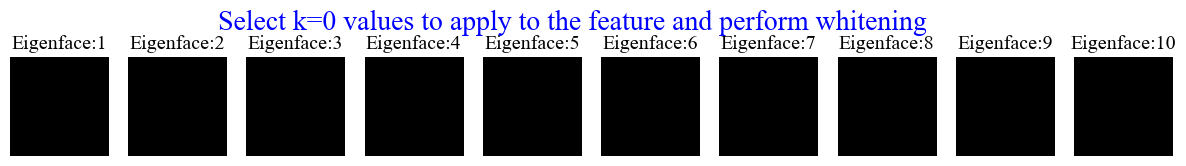

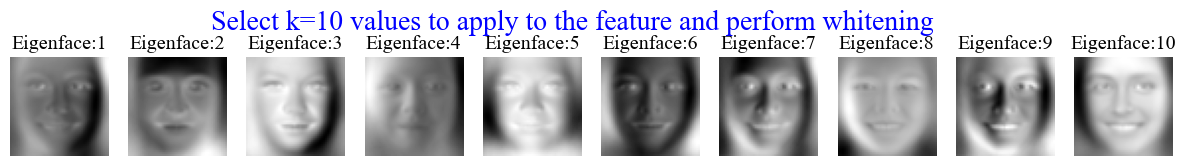

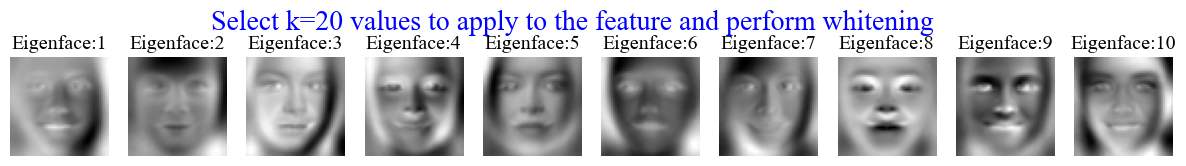

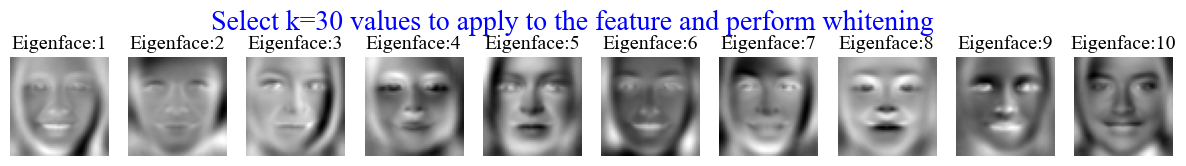

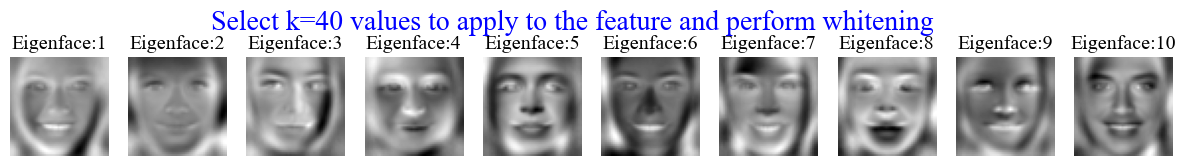

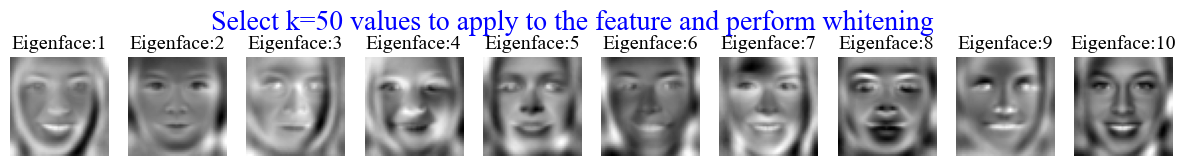

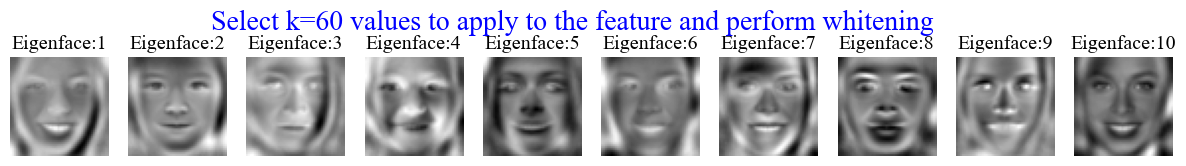

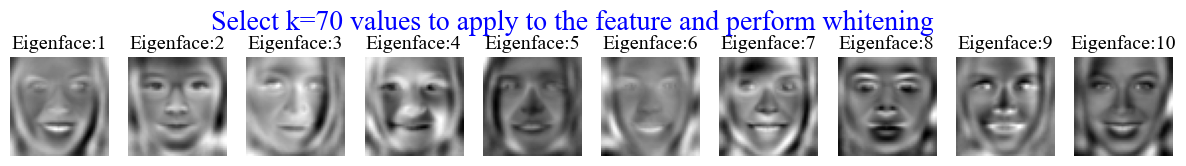

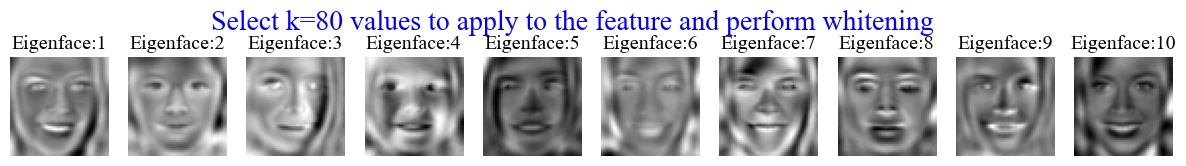

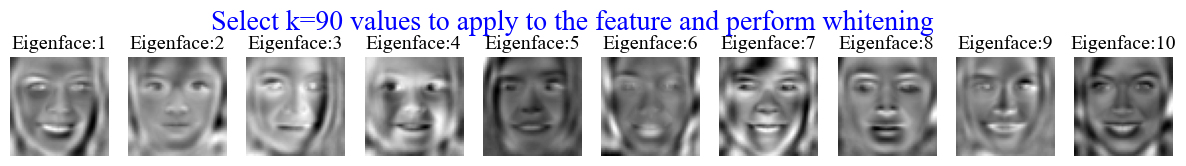

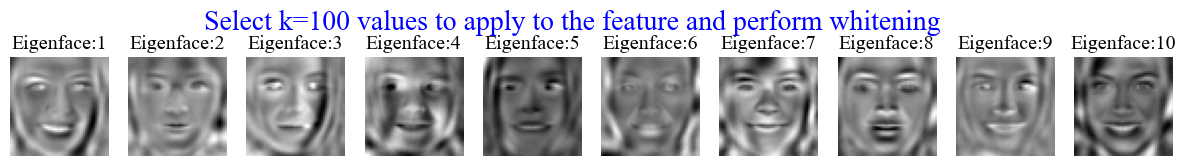

In [51]:
for k in range(0,110,10):
    X_train_visualize = X_train_demean@PT.T[:, :k] @ np.linalg.inv(np.diag(e_values_sqr[:k])) @ PT[:k, :]

    row = 10
    fig, ax = plt.subplots(1,row,figsize=(15,2))

    for i in range(row):
        eigenface = X_train_visualize[i, :].reshape((50, 50))
        ax[i].imshow(eigenface, cmap='gray')
        ax[i].set_title(f"Eigenface:{i + 1}")
        ax[i].axis('off')

        plt.suptitle(f"Select k={k} values to apply to the feature and perform whitening",fontname='TImes New Roman',color='blue',fontsize=20)


plt.show()

# Discussion: How SVD is used here

# <font color= red> 完善 </font>

___

# ANN part

## Predict Function:
##### 1. This function implements with one hidden layer feedfoward neural network. We take each row of the training set as the input layer and add a bias term to each row. 
##### 2. After adding, we dot product it with the added bias term and $W_{hidden}$ (we will introduce later), and use the activation function (sigmoid function) to map the output of the hidden layer 0 to 1. 
##### 3. We add another bias term to the output just calculated. After that, we dot product it with $W_{output}$ (we will also introduce it later). Then we can get a value (predicted value). 
##### 4. Last, we return 3 values respectively: predicted value, add a bias term to each row of the training set, and add another bias term to the hidden layer output value.

## Activation Function:
##### 1. The activation function used here is sigmoid function.
##### 2. The formula for the sigmoid function is:  $y =\frac{1}{1+e^{-x}}$.

# <font color = green>检查！！！ </font>

In [52]:
def sigmoid(y):
    return 1/(1+np.exp(-y))

In [53]:
def predict(X, W_hidden,W_output):

    y_pred = []
    for i in range(X.shape[0]):
        x_i = X[i:i+1]
        x_i_1 = np.hstack([x_i,[[1]]])
        x_h_i = sigmoid(W_hidden@x_i_1.T)
        x_h_i_1 = np.vstack([x_h_i,[1]])
        x_o = W_output@x_h_i_1
        y_pred.append([x_o[0][0]])

    return np.array(y_pred),x_h_i_1,x_i_1

# Using Grid Search find the best ANN hyperparameter

## SGD:
##### 1. $k = [30,50,70]$
##### 2. learning rate = $[0.002,0.01,0.05]$
##### 3. hidden layer = $[4,8,16] $
##### 4. epoch = $ 0 - 200$


##### Here, let's talk about why we choose all of these parameters for the experiment. 
##### 1. First, we created a simple model from k = 10 until 200 and found that the best range is around 50 in manual experiment, so we choose 30,50,70 for k. 
##### 2. Second, the range for the learning rate cannot be too large. If the range exceeds too much, the loss function will not decrease.  
##### 3. Third, we choose 200 epochs because overfitting will occur at about 100 in manual experiment, so we adjusted it to 200 to ensure the best results. 
##### 4. Finally, if the hidden layer size is too large, we will not be able to run it in time. The grid search here takes an everage of 7 hours to run the program to find the best parameters, so we have annotated this part and also explained how we choose parameters and find the best parameter.

## Adam:

##### 1. alpha init = $[0.00005, 0.0001, 0.0002]$

# <font color = green> 检查+完善一下Adam初始值这里的介绍 </font>

# SGD ANN for predict age (Experiment)
### parameter: loss=0.018824409849085212,k=70,learning_rate=0.01,neuron_in_hidden_layer=8,e=146

In [55]:
ks = [30, 50 , 70]
learning_rates = [0.002, 0.01, 0.05]
neurons = [4, 8 ,16]
best_loss = 1000000

for k in ks:
    for learning_rate in learning_rates:
        for neuron_in_hidden_layer in neurons:

            Q1, s1, PT1 = LA.svd(X_train_demean.copy())
            e_values_sqr1 = s1 / X_train.shape[0] ** 0.5
            Q2, s2, PT2 = LA.svd(X_test_demean.copy())
            e_values_sqr2 = s2 / X_test.shape[0] ** 0.5
            
            X_train_whitten_reduced = X_train_demean@PT1.T[:, :k] @ LA.inv(np.diag(e_values_sqr1[:k]))  @ PT1[:k, :]
            X_test_whitten_reduced = X_test_demean@PT2.T[:, :k] @ LA.inv(np.diag(e_values_sqr2[:k])) @ PT2[:k, :]
            
    
            ann_whitten_X_train = X_train_whitten_reduced.copy()
            ann_y_age_train = y_ages_train.copy()
            ann_y_genders_train = y_genders_train.copy()
            
            
            
            ann_whitten_X_test = X_test_whitten_reduced.copy()
            ann_y_age_test = y_ages_test.copy()
            ann_y_genders_test = y_genders_test.copy()
            
            
            
            
            W_hidden = np.random.randn(neuron_in_hidden_layer,ann_whitten_X_train.shape[1]+1)/k
            
            W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer
            
            
            for e in range(200):# for each epoch
                for i in range(X_train.shape[0]):
                    #define input and output
                    x_i = ann_whitten_X_train[i:i+1]
                    y_i = ann_y_age_train[i]
            
                    y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)
            
                    delta_k = y_i - y_pred_i
            
                    #Gradient for output layer
                    Gradient_output  = -delta_k*x_h_i_1.T
                    
            
                
                    W_output = W_output - learning_rate * Gradient_output
            
            
                    delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k
            
                    # Update each hidden unit
                    Gradient_hidden = np.zeros_like(W_hidden)
                    for h in range(W_hidden.shape[0]):
            
                        #Gradient for hidden layer
                        Gradient_hidden[h,:] =  - delta_h[h] * x_i_1
            
                    # Gradient Descent rule
                    
                
                    W_hidden = W_hidden - learning_rate * Gradient_hidden
            
                    
                y_pred,_,_ = predict(ann_whitten_X_train, W_hidden,W_output)
                test_y_pred,_,_ = predict(ann_whitten_X_test, W_hidden, W_output)
                
                loss = mean_squared_error(ann_y_age_test,test_y_pred)
                if loss < best_loss:
                    print(f"{loss=},{k=},{learning_rate=},{neuron_in_hidden_layer=},{e=}")
                    best_loss = loss

loss=0.04067360310760173,k=30,learning_rate=0.002,neuron_in_hidden_layer=4,e=0
loss=0.03295195079915517,k=30,learning_rate=0.002,neuron_in_hidden_layer=4,e=1
loss=0.03165186320011495,k=30,learning_rate=0.002,neuron_in_hidden_layer=4,e=2
loss=0.03157465302316921,k=30,learning_rate=0.002,neuron_in_hidden_layer=4,e=3
loss=0.03157352554111033,k=30,learning_rate=0.002,neuron_in_hidden_layer=4,e=5
loss=0.03156308185780295,k=30,learning_rate=0.002,neuron_in_hidden_layer=4,e=6
loss=0.031550758210733144,k=30,learning_rate=0.002,neuron_in_hidden_layer=4,e=7
loss=0.03153773348474975,k=30,learning_rate=0.002,neuron_in_hidden_layer=4,e=8
loss=0.03152435231676493,k=30,learning_rate=0.002,neuron_in_hidden_layer=4,e=9
loss=0.03151071160100907,k=30,learning_rate=0.002,neuron_in_hidden_layer=4,e=10
loss=0.031496836855627576,k=30,learning_rate=0.002,neuron_in_hidden_layer=4,e=11
loss=0.031482732747558924,k=30,learning_rate=0.002,neuron_in_hidden_layer=4,e=12
loss=0.03146839768567424,k=30,learning_rate=0.

# ADAM ANN for predict age (Experiment)
### parameter: loss=0.01801799930343202,k=50,alpha_init=5e-05,neuron_in_hidden_layer=16,e=84

In [ ]:
ks = [30, 50 , 70]
learning_rates = [0.00005, 0.0001, 0.0002]
neurons = [4, 8 ,16]
best_loss = 1000000

for k in ks:
    for alpha_init in learning_rates:
        for neuron_in_hidden_layer in neurons:
            
            Q1, s1, PT1 = LA.svd(X_train_demean.copy())
            e_values_sqr1 = s1 / X_train.shape[0] ** 0.5
            Q2, s2, PT2 = LA.svd(X_test_demean.copy())
            e_values_sqr2 = s2 / X_test.shape[0] ** 0.5
            
            X_train_whitten_reduced = X_train_demean@PT1.T[:, :k] @ LA.inv(np.diag(e_values_sqr1[:k]))  @ PT1[:k, :]
            X_test_whitten_reduced = X_test_demean@PT2.T[:, :k] @ LA.inv(np.diag(e_values_sqr2[:k])) @ PT2[:k, :]
            
    
            ann_whitten_X_train = X_train_whitten_reduced.copy()
            ann_y_age_train = y_ages_train.copy()
            ann_y_genders_train = y_genders_train.copy()
            
            
            
            ann_whitten_X_test = X_test_whitten_reduced.copy()
            ann_y_age_test = y_ages_test.copy()
            ann_y_genders_test = y_genders_test.copy()
            
            
            
            
            W_hidden = np.random.randn(neuron_in_hidden_layer,ann_whitten_X_train.shape[1]+1)/k
            
            W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer
            
            small_value = 1e-8
            
            
            A_hidden = np.zeros_like(W_hidden)
            F_hidden = np.zeros_like(W_hidden)
            
            A_output = np.zeros_like(W_output)
            F_output = np.zeros_like(W_output)
            
            rho = 0.999
            rho_f = 0.9
            
            
            for e in range(200):# for each epoch
                for i in range(X_train.shape[0]):
                    #define input and output
                    x_i = ann_whitten_X_train[i:i+1]
                    y_i = ann_y_age_train[i]
            
                    y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)
            
                    delta_k = y_i - y_pred_i
            
                    #Gradient for output layer
                    Gradient_output  = -delta_k*x_h_i_1.T
                    
                    A_output = (rho)*A_output + (1-rho)*(Gradient_output)**2
            
                    F_output = rho_f*F_output + (1-rho_f)*(Gradient_output)
                
                    alpha_t = alpha_init*(np.sqrt(1-rho**(i+1)))/(1-rho_f**(i+1))
                
                    W_output = W_output - alpha_t*F_output/np.sqrt(A_output+small_value)
            
            
                    delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k
            
                    # Update each hidden unit
                    Gradient_hidden = np.zeros_like(W_hidden)
                    for h in range(W_hidden.shape[0]):
            
                        #Gradient for hidden layer
                        Gradient_hidden[h,:] =  - delta_h[h] * x_i_1
            
                    # Gradient Descent rule
                    
                    A_hidden = (rho)*A_hidden + (1-rho)*(Gradient_hidden)**2
            
                    F_hidden = rho_f*F_hidden + (1-rho_f)*(Gradient_hidden)
                
                    alpha_t = alpha_init*(np.sqrt(1-rho**(i+1)))/(1-rho_f**(i+1))
                
                    W_hidden = W_hidden - alpha_t*F_hidden/np.sqrt(A_hidden+small_value)
            
                    
                y_pred,_,_ = predict(ann_whitten_X_train, W_hidden,W_output)
                test_y_pred,_,_ = predict(ann_whitten_X_test, W_hidden, W_output)
                
                loss = mean_squared_error(ann_y_age_test,test_y_pred)
                if loss < best_loss:
                    print(f"{loss=},{k=},{alpha_init=},{neuron_in_hidden_layer=},{e=}")
                    best_loss = loss


# SGD ANN for predict gender (Experiment)
### parameter: loss=0.5643993404079753,k=30,learning_rate=0.002,neuron_in_hidden_layer=4,e=132

In [56]:
ks = [30, 50 , 70]
learning_rates = [0.002, 0.01, 0.05]
neurons = [4, 8 ,16]
best_loss = 1000000

for k in ks:
    for learning_rate in learning_rates:
        for neuron_in_hidden_layer in neurons:
            
            
            
            Q1, s1, PT1 = LA.svd(X_train_demean.copy())
            e_values_sqr1 = s1 / X_train.shape[0] ** 0.5
            Q2, s2, PT2 = LA.svd(X_test_demean.copy())
            e_values_sqr2 = s2 / X_test.shape[0] ** 0.5
            
            X_train_whitten_reduced = X_train_demean@PT1.T[:, :k] @ LA.inv(np.diag(e_values_sqr1[:k]))  @ PT1[:k, :]
            X_test_whitten_reduced = X_test_demean@PT2.T[:, :k] @ LA.inv(np.diag(e_values_sqr2[:k])) @ PT2[:k, :]
            
    
            ann_whitten_X_train = X_train_whitten_reduced.copy()
            ann_y_age_train = y_ages_train.copy()
            ann_y_genders_train = y_genders_train.copy()
            
            
            
            ann_whitten_X_test = X_test_whitten_reduced.copy()
            ann_y_age_test = y_ages_test.copy()
            ann_y_genders_test = y_genders_test.copy()
            
            
            
            
            
            
            
            W_hidden = np.random.randn(neuron_in_hidden_layer,ann_whitten_X_train.shape[1]+1)/k
            
            W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer
            
            
            
            
            
            for e in range(200):# for each epoch
                for i in range(X_train.shape[0]):
                    #define input and output
                    x_i = ann_whitten_X_train[i:i+1]
                    y_i = ann_y_genders_train[i]
            
                    y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)
            
                    delta_k = y_i - y_pred_i
            
                    #Gradient for output layer
                    Gradient_output  = -delta_k*x_h_i_1.T
                    
                
                    W_output = W_output - learning_rate * Gradient_output
                    
            
            
                    delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k
            
                    # Update each hidden unit
                    Gradient_hidden = np.zeros_like(W_hidden)
                    for h in range(W_hidden.shape[0]):
            
                        #Gradient for hidden layer
                        Gradient_hidden[h,:] =  - delta_h[h] * x_i_1
            
                    # Gradient Descent rule
                
                    W_hidden = W_hidden - learning_rate * Gradient_hidden
                    
            
                y_pred,_,_ = predict(ann_whitten_X_train, W_hidden,W_output)
                test_y_pred,_,_ = predict(ann_whitten_X_test, W_hidden, W_output)
                
                loss = mean_squared_error(ann_y_genders_test,test_y_pred)
                if loss < best_loss:
                    print(f"{loss=},{k=},{learning_rate=},{neuron_in_hidden_layer=},{e=}")
                    best_loss = loss
    


loss=0.8500582914940656,k=30,learning_rate=0.002,neuron_in_hidden_layer=4,e=0
loss=0.8287627276144973,k=30,learning_rate=0.002,neuron_in_hidden_layer=4,e=1
loss=0.8284544388922093,k=30,learning_rate=0.002,neuron_in_hidden_layer=4,e=15
loss=0.8274725106479974,k=30,learning_rate=0.002,neuron_in_hidden_layer=4,e=16
loss=0.8263234703118699,k=30,learning_rate=0.002,neuron_in_hidden_layer=4,e=17
loss=0.8250207280090256,k=30,learning_rate=0.002,neuron_in_hidden_layer=4,e=18
loss=0.823579669787055,k=30,learning_rate=0.002,neuron_in_hidden_layer=4,e=19
loss=0.8220123654101876,k=30,learning_rate=0.002,neuron_in_hidden_layer=4,e=20
loss=0.8203245021856456,k=30,learning_rate=0.002,neuron_in_hidden_layer=4,e=21
loss=0.818516106322605,k=30,learning_rate=0.002,neuron_in_hidden_layer=4,e=22
loss=0.81658572471324,k=30,learning_rate=0.002,neuron_in_hidden_layer=4,e=23
loss=0.8145359068804041,k=30,learning_rate=0.002,neuron_in_hidden_layer=4,e=24
loss=0.8123771359295663,k=30,learning_rate=0.002,neuron_in

# ADAM ANN for predict gender (Experiment)
### parameter: loss=0.5688725434548833,k=50,alpha_init=5e-05,neuron_in_hidden_layer=16,e=98

In [ ]:
ks = [30, 50 , 70]
learning_rates = [0.00005, 0.0001, 0.0002]
neurons = [4, 8 ,16]
best_loss = 1000000

for k in ks:
    for alpha_init in learning_rates:
        for neuron_in_hidden_layer in neurons:

            
            Q1, s1, PT1 = LA.svd(X_train_demean.copy())
            e_values_sqr1 = s1 / X_train.shape[0] ** 0.5
            Q2, s2, PT2 = LA.svd(X_test_demean.copy())
            e_values_sqr2 = s2 / X_test.shape[0] ** 0.5
            
            X_train_whitten_reduced = X_train_demean@PT1.T[:, :k] @ LA.inv(np.diag(e_values_sqr1[:k]))  @ PT1[:k, :]
            X_test_whitten_reduced = X_test_demean@PT2.T[:, :k] @ LA.inv(np.diag(e_values_sqr2[:k])) @ PT2[:k, :]
            
    
            ann_whitten_X_train = X_train_whitten_reduced.copy()
            ann_y_age_train = y_ages_train.copy()
            ann_y_genders_train = y_genders_train.copy()
            
            
            
            ann_whitten_X_test = X_test_whitten_reduced.copy()
            ann_y_age_test = y_ages_test.copy()
            ann_y_genders_test = y_genders_test.copy()
            
            
            
            W_hidden = np.random.randn(neuron_in_hidden_layer,ann_whitten_X_train.shape[1]+1)/k
            
            W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer
            
            small_value = 1e-8
            
            
            A_hidden = np.zeros_like(W_hidden)
            F_hidden = np.zeros_like(W_hidden)
            
            A_output = np.zeros_like(W_output)
            F_output = np.zeros_like(W_output)
            
            rho = 0.999
            rho_f = 0.9
            
            
            
            for e in range(200):# for each epoch
                for i in range(X_train.shape[0]):
                    #define input and output
                    x_i = ann_whitten_X_train[i:i+1]
                    y_i = ann_y_genders_train[i]
            
                    y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)
            
                    delta_k = y_i - y_pred_i
            
                    #Gradient for output layer
                    Gradient_output  = -delta_k*x_h_i_1.T
                    
                    A_output = (rho)*A_output + (1-rho)*(Gradient_output)**2
            
                    F_output = rho_f*F_output + (1-rho_f)*(Gradient_output)
                
                    alpha_t = alpha_init*(np.sqrt(1-rho**(i+1)))/(1-rho_f**(i+1))
                
                    W_output = W_output - alpha_t*F_output/np.sqrt(A_output+small_value)
                    
            
            
                    delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k
            
                    # Update each hidden unit
                    Gradient_hidden = np.zeros_like(W_hidden)
                    for h in range(W_hidden.shape[0]):
            
                        #Gradient for hidden layer
                        Gradient_hidden[h,:] =  - delta_h[h] * x_i_1
            
                    # Gradient Descent rule
                    
                    A_hidden = (rho)*A_hidden + (1-rho)*(Gradient_hidden)**2
            
                    F_hidden = rho_f*F_hidden + (1-rho_f)*(Gradient_hidden)
                
                    alpha_t = alpha_init*(np.sqrt(1-rho**(i+1)))/(1-rho_f**(i+1))
                
                    W_hidden = W_hidden - alpha_t*F_hidden/np.sqrt(A_hidden+small_value)
                    
            
            
                y_pred,_,_ = predict(ann_whitten_X_train, W_hidden,W_output)
                test_y_pred,_,_ = predict(ann_whitten_X_test, W_hidden, W_output)
                
                loss = mean_squared_error(ann_y_genders_test,test_y_pred)
                if loss < best_loss:
                    print(f"{loss=},{k=},{alpha_init=},{neuron_in_hidden_layer=},{e=}")
                    best_loss = loss
    

____

# ANN Model 

##### Basically, the steps of the model here is similiar. The difference things is in the use of optimizers. Here, our model is trained using the whitened training set （but this part we use original dataset) and the original training set (trying which one performance is better). 

##### 1. First, we initialize the weight values $W_{hidden}$ and $W_{output}$. $W_{hidden}$ is the weight between input layer and hidden layer, while $W_{output}$ is the weight between hidden layer and output layer.

##### 2. Then we train the training set of each row to perform the feedforward Neural Network algorithm (predict function). After the calculation, the function will return the values we just mentioned.

##### 3. After this, we will use the backpropagation algorithm. First, we calculate the error term of the output layer: $\delta k = y_i - Y{{Pred}_i}$. 
##### Next, we calculate the $\nabla w_{output} L = -\delta k * x^T_{hidden}$, where $\nabla w_{output} L$ is the gradient loss function of the output layer and we use the learning rate optimizer to update the new $W_{output}$ (this will be introduced in the usage section).

##### 4. After updating the new $W_{output}$, we continue to update the new $W_{hidden}$. 
##### First, we calculate the error term of the hidden layer: $\delta h = X_{hidden} *(1- X_{hidden})*W^T_{output}*\delta k$, then we compute the gradient loss function of the hidden layer: $\nabla w_{hidden} L = -\delta h * x_i$


# <font color = green> 检查+整理一下</font>

# Predicting age based on ANN using optimizer SGD (Original Dataset)

##### The optimizer used here is SGD, whose update rule is $W_{output} \Leftarrow W_{output} - \alpha * \nabla w_{hidden} L$

 # <font color = green> 完善 <font>

In [ ]:
k = 70
learning_rate = 0.01
neuron_in_hidden_layer = 8

ann_X_train = X_train.copy()
ann_y_age_train = y_ages_train.copy()

ann_X_test = X_test.copy()
ann_y_age_test = y_ages_test.copy()
ann_y_genders_test = y_genders_test.copy()

ann_y_genders_test = (ann_y_genders_test + 1) /2


W_hidden = np.random.randn(neuron_in_hidden_layer,ann_X_train.shape[1]+1)/k

W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer


for e in range(146):# for each epoch
    for i in range(X_train.shape[0]):
        #define input and output
        x_i = ann_X_train[i:i+1]
        y_i = ann_y_age_train[i]

        y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)

        delta_k = y_i - y_pred_i

        #Gradient for output layer
        Gradient_output  = -delta_k*x_h_i_1.T



        W_output = W_output - learning_rate * Gradient_output


        delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k

        # Update each hidden unit
        Gradient_hidden = np.zeros_like(W_hidden)
        for h in range(W_hidden.shape[0]):

            #Gradient for hidden layer
            Gradient_hidden[h,:] =  - delta_h[h] * x_i_1

        # Gradient Descent rule


        W_hidden = W_hidden - learning_rate * Gradient_hidden


    y_pred,_,_ = predict(ann_X_train, W_hidden,W_output)
    test_y_pred,_,_ = predict(ann_X_test, W_hidden, W_output)

    loss = mean_squared_error(ann_y_age_test,test_y_pred)

    print(f"{loss=},{e=}")
                    

# Visualize the result of predicting age based on ANN using optimizer SGD (Original Dataset)

In [ ]:
row = 15
offset = 200
fig, ax = plt.subplots(1, row, figsize=(25,3))

test_y_pred,_,_ = predict(ann_X_test, W_hidden, W_output)


for i in range(offset, row + offset):
    face = X_test[i, :].reshape((50, 50))
    ax[i - offset].imshow(face, cmap='gray')
    ax[i - offset].set_title(f"Face:{i+1}\nActual: {int(y_ages_test[i] * 100)}\nPredicted: {round(test_y_pred[i, 0] * 100)}")
    ax[i - offset].axis('off')

plt.suptitle("The faces image predict ages based on ANN using optimizer SGD",fontname='TImes New Roman',color='blue',fontsize=20)

# Predicting age based on ANN using optimizer Adam (Original Dataset)
##### The optimizer used here is Adam, whose update rule is:
##### 
1. $A \Leftarrow  \rho A + (1-\rho) (\nabla w_{output}L)^2 $ 
2. $F \Leftarrow \rho_f F_i + (1 - \rho_f) (\nabla w_{output L})^2 $
3. $\alpha_t = \alpha (\frac{\sqrt{1-p^t}}{1-p^t_f})$
4. $ W_{output} = W_{output} - \frac{\alpha_t}{\sqrt{A}}F $

# <font color = green> 完善+整理 </font>

In [ ]:

k = 50
alpha_init = 0.00005
neuron_in_hidden_layer = 16

ann_X_train2 = X_train.copy()
ann_y_age_train = y_ages_train.copy()
ann_y_genders_train = y_genders_train.copy()




ann_X_test2 = X_test.copy()
ann_y_age_test = y_ages_test.copy()
ann_y_genders_test = y_genders_test.copy()




W_hidden = np.random.randn(neuron_in_hidden_layer,ann_X_train2.shape[1]+1)/k

W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer

small_value = 1e-8


A_hidden = np.zeros_like(W_hidden)
F_hidden = np.zeros_like(W_hidden)

A_output = np.zeros_like(W_output)
F_output = np.zeros_like(W_output)

rho = 0.999
rho_f = 0.9


for e in range(84):# for each epoch
    for i in range(X_train.shape[0]):
        #define input and output
        x_i = ann_X_train2[i:i+1]
        y_i = ann_y_age_train[i]

        y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)

        delta_k = y_i - y_pred_i

        #Gradient for output layer
        
        Gradient_output  = -delta_k*x_h_i_1.T

        A_output = (rho)*A_output + (1-rho)*(Gradient_output)**2

        F_output = rho_f*F_output + (1-rho_f)*(Gradient_output)

        alpha_t = alpha_init*(np.sqrt(1-rho**(i+1)))/(1-rho_f**(i+1))

        W_output = W_output - alpha_t*F_output/np.sqrt(A_output+small_value)


        delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k

        # Update each hidden unit
        Gradient_hidden = np.zeros_like(W_hidden)
        for h in range(W_hidden.shape[0]):

            #Gradient for hidden layer
            Gradient_hidden[h,:] =  - delta_h[h] * x_i_1

        # Gradient Descent rule

        A_hidden = (rho)*A_hidden + (1-rho)*(Gradient_hidden)**2

        F_hidden = rho_f*F_hidden + (1-rho_f)*(Gradient_hidden)

        alpha_t = alpha_init*(np.sqrt(1-rho**(i+1)))/(1-rho_f**(i+1))

        W_hidden = W_hidden - alpha_t*F_hidden/np.sqrt(A_hidden+small_value)


    y_pred,_,_ = predict(ann_X_train2, W_hidden,W_output)
    test_y_pred,_,_ = predict(ann_X_test, W_hidden, W_output)

    loss = mean_squared_error(ann_y_age_test,test_y_pred)
    print(f"{loss=},{e=}")

# Visualize the result of predicting age based on ANN using optimizer Adam (Original Dataset)

In [ ]:

row = 15
offset = 200
fig, ax = plt.subplots(1, row, figsize=(25,3))

test_y_pred,_,_ = predict(ann_X_test2, W_hidden, W_output)


for i in range(offset, row + offset):
    face = X_test[i, :].reshape((50, 50))
    ax[i - offset].imshow(face, cmap='gray')
    ax[i - offset].set_title(f"Face:{i+1}\nActual: {int(y_ages_test[i] * 100)}\nPredicted: {round(test_y_pred[i, 0] * 100)}")
    ax[i - offset].axis('off')

plt.suptitle("The faces image predict ages based on ANN using optimizer Adam",fontname='TImes New Roman',color='blue',fontsize=20)

# Predicting gender based on ANN using optimizer SGD (Original Dataset)


In [ ]:

k = 30
learning_rate = 0.002
neuron_in_hidden_layer = 4


ann_X_train3 = X_train.copy()
ann_y_age_train = y_ages_train.copy()
ann_y_genders_train = y_genders_train.copy()

ann_X_test3 = X_test.copy()
ann_y_age_test = y_ages_test.copy()
ann_y_genders_test = y_genders_test.copy()


W_hidden = np.random.randn(neuron_in_hidden_layer,ann_X_train3.shape[1]+1)/k

W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer





for e in range(132):# for each epoch
    for i in range(X_train.shape[0]):
        #define input and output
        x_i = ann_X_train3[i:i+1]
        y_i = ann_y_genders_train[i]

        y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)

        delta_k = y_i - y_pred_i

        #Gradient for output layer
        Gradient_output  = -delta_k*x_h_i_1.T


        W_output = W_output - learning_rate * Gradient_output



        delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k

        # Update each hidden unit
        Gradient_hidden = np.zeros_like(W_hidden)
        for h in range(W_hidden.shape[0]):

            #Gradient for hidden layer
            Gradient_hidden[h,:] =  - delta_h[h] * x_i_1

        # Gradient Descent rule

        W_hidden = W_hidden - learning_rate * Gradient_hidden


    y_pred,_,_ = predict(ann_X_train3, W_hidden,W_output)
    test_y_pred,_,_ = predict(ann_X_test3, W_hidden, W_output)

    loss = mean_squared_error(ann_y_genders_test,test_y_pred)
    print(f"{loss=},{e=}")

# Visualize the result of predicting gender based on ANN using optimizer SGD (Original Dataset)

In [ ]:
row = 15
offset = 200
fig, ax = plt.subplots(1, row, figsize=(25,3))

test_y_pred,_,_ = predict(ann_X_test3, W_hidden, W_output)
test_y_pred = test_y_pred.reshape((-1))



for i in range(offset, row + offset):
    face = X_test[i, :].reshape((50, 50))
    ax[i - offset].imshow(face, cmap='gray')
    ax[i - offset].set_title(f"Face:{i+1}\nActual: {int(ann_y_genders_test[i])}\nPredicted: {int(test_y_pred[i] > 0) * 2 - 1}") 
    ax[i - offset].axis('off')

plt.suptitle("The faces image predict gender based on ANN using optimizer SGD (Original Dataset)",fontname='TImes New Roman',color='blue',fontsize=20)

# Predicting gender based on ANN using optimizer Adam (Original Dataset)


In [ ]:
k = 50
alpha_init = 0.00005
neuron_in_hidden_layer = 16

ann_X_train4 = X_train.copy()
ann_y_genders_train = y_genders_train.copy()



ann_X_test4 = X_test.copy()
ann_y_genders_test = y_genders_test.copy()

W_hidden = np.random.randn(neuron_in_hidden_layer,ann_X_train4.shape[1]+1)/k

W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer

small_value = 1e-8


A_hidden = np.zeros_like(W_hidden)
F_hidden = np.zeros_like(W_hidden)

A_output = np.zeros_like(W_output)
F_output = np.zeros_like(W_output)

rho = 0.999
rho_f = 0.9



for e in range(98):# for each epoch
    for i in range(X_train.shape[0]):
        #define input and output
        x_i = ann_X_train4[i:i+1]
        y_i = ann_y_genders_train[i]

        y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)

        delta_k = y_i - y_pred_i

        #Gradient for output layer
        Gradient_output  = -delta_k*x_h_i_1.T

        A_output = (rho)*A_output + (1-rho)*(Gradient_output)**2

        F_output = rho_f*F_output + (1-rho_f)*(Gradient_output)

        alpha_t = alpha_init*(np.sqrt(1-rho**(i+1)))/(1-rho_f**(i+1))

        W_output = W_output - alpha_t*F_output/np.sqrt(A_output+small_value)



        delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k

        # Update each hidden unit
        Gradient_hidden = np.zeros_like(W_hidden)
        for h in range(W_hidden.shape[0]):

            #Gradient for hidden layer
            Gradient_hidden[h,:] =  - delta_h[h] * x_i_1

        # Gradient Descent rule

        A_hidden = (rho)*A_hidden + (1-rho)*(Gradient_hidden)**2

        F_hidden = rho_f*F_hidden + (1-rho_f)*(Gradient_hidden)

        alpha_t = alpha_init*(np.sqrt(1-rho**(i+1)))/(1-rho_f**(i+1))

        W_hidden = W_hidden - alpha_t*F_hidden/np.sqrt(A_hidden+small_value)



    y_pred,_,_ = predict(ann_X_train4, W_hidden,W_output)
    test_y_pred,_,_ = predict(ann_X_test4, W_hidden, W_output)

    loss = mean_squared_error(ann_y_genders_test,test_y_pred)
    print(f"{loss=},{e=}")
    

print(np.mean((ann_y_genders_test < 0 )== (test_y_pred < 0)))

# Visualize the result of predicting gender based on ANN using optimizer Adam (Original Dataset)

In [ ]:
row = 15
offset = 200
fig, ax = plt.subplots(1, row, figsize=(25,3))

test_y_pred,_,_ = predict(ann_X_test4, W_hidden, W_output)
test_y_pred = test_y_pred.reshape((-1))

for i in range(offset, row + offset):
    face = X_test[i, :].reshape((50, 50))
    ax[i - offset].imshow(face, cmap='gray')
    ax[i - offset].set_title(f"Face:{i+1}\nActual: {int(ann_y_genders_test[i])}\nPredicted: {int(test_y_pred[i] > 0) * 2 - 1}") 
    ax[i - offset].axis('off')

plt.suptitle("The faces image predict gender based on ANN using optimizer Adam ",fontname='TImes New Roman',color='blue',fontsize=20)

___

# Whittening Dataset
##### Here, the dataset we used have whitened dataset to do ANN

# Predicting age based on ANN using optimizer SGD (Whittening Dataset)
## parameter: loss=0.02433271330401967,k=70,learning_rate=0.01,neuron_in_hidden_layer=16,e=199

In [ ]:

k = 70
learning_rate = 0.01
neuron_in_hidden_layer = 16

Q1, s1, PT1 = LA.svd(X_train_demean.copy())
e_values_sqr1 = s1 / X_train.shape[0] ** 0.5
Q2, s2, PT2 = LA.svd(X_test_demean.copy())
e_values_sqr2 = s2 / X_test.shape[0] ** 0.5

X_train_whitten_reduced = X_train_demean@PT1.T[:, :k] @ LA.inv(np.diag(e_values_sqr1[:k]))  @ PT1[:k, :]
X_test_whitten_reduced = X_test_demean@PT2.T[:, :k] @ LA.inv(np.diag(e_values_sqr2[:k])) @ PT2[:k, :]


ann_whitten_X_train = X_train_whitten_reduced.copy()
ann_y_age_train = y_ages_train.copy()
ann_y_genders_train = y_genders_train.copy()



ann_whitten_X_test = X_test_whitten_reduced.copy()
ann_y_age_test = y_ages_test.copy()
ann_y_genders_test = y_genders_test.copy()



W_hidden = np.random.randn(neuron_in_hidden_layer,ann_whitten_X_train.shape[1]+1)/k

W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer




for e in range(199):# for each epoch
    for i in range(X_train.shape[0]):
        #define input and output
        x_i = ann_whitten_X_train[i:i+1]
        y_i = ann_y_age_train[i]

        y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)

        delta_k = y_i - y_pred_i

        #Gradient for output layer
        Gradient_output  = -delta_k*x_h_i_1.T



        W_output = W_output - learning_rate * Gradient_output


        delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k

        # Update each hidden unit
        Gradient_hidden = np.zeros_like(W_hidden)
        for h in range(W_hidden.shape[0]):

            #Gradient for hidden layer
            Gradient_hidden[h,:] =  - delta_h[h] * x_i_1

        # Gradient Descent rule


        W_hidden = W_hidden - learning_rate * Gradient_hidden


    y_pred,_,_ = predict(ann_whitten_X_train, W_hidden,W_output)
    test_y_pred,_,_ = predict(ann_whitten_X_test, W_hidden, W_output)

    loss = mean_squared_error(ann_y_age_test,test_y_pred)

    print(f"{loss=},{e=}")



# Visualize the result of predicting age based on ANN using optimizer SGD (Whittening Dataset)

In [ ]:
row = 15
offset = 200
fig, ax = plt.subplots(1, row, figsize=(25,3))

test_y_pred,_,_ = predict(ann_whitten_X_test, W_hidden, W_output)


for i in range(offset, row + offset):
    face = X_test[i, :].reshape((50, 50))
    ax[i - offset].imshow(face, cmap='gray')
    ax[i - offset].set_title(f"Face:{i+1}\nActual: {int(y_ages_test[i] * 100)}\nPredicted: {round(test_y_pred[i, 0] * 100)}")
    ax[i - offset].axis('off')

plt.suptitle("The faces image predict ages based on ANN using optimizer SGD",fontname='TImes New Roman',color='blue',fontsize=20)

# Predicting age based on ANN using optimizer Adam (Whittening Dataset)
## parameter: loss=0.024123624433853165,k=70,alpha_init=0.0001,neuron_in_hidden_layer=8,e=155

In [ ]:

k = 70
alpha_init = 0.0001
neuron_in_hidden_layer = 8



Q1, s1, PT1 = LA.svd(X_train_demean.copy())
e_values_sqr1 = s1 / X_train.shape[0] ** 0.5
Q2, s2, PT2 = LA.svd(X_test_demean.copy())
e_values_sqr2 = s2 / X_test.shape[0] ** 0.5

X_train_whitten_reduced = X_train_demean@PT1.T[:, :k] @ LA.inv(np.diag(e_values_sqr1[:k]))  @ PT1[:k, :]
X_test_whitten_reduced = X_test_demean@PT2.T[:, :k] @ LA.inv(np.diag(e_values_sqr2[:k])) @ PT2[:k, :]



ann_whitten_X_train = X_train_whitten_reduced.copy()
ann_y_age_train = y_ages_train.copy()
ann_y_genders_train = y_genders_train.copy()



ann_whitten_X_test = X_test_whitten_reduced.copy()
ann_y_age_test = y_ages_test.copy()
ann_y_genders_test = y_genders_test.copy()




W_hidden = np.random.randn(neuron_in_hidden_layer,ann_whitten_X_train.shape[1]+1)/k

W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer

small_value = 1e-8


A_hidden = np.zeros_like(W_hidden)
F_hidden = np.zeros_like(W_hidden)

A_output = np.zeros_like(W_output)
F_output = np.zeros_like(W_output)

rho = 0.999
rho_f = 0.9


for e in range(155):# for each epoch
    for i in range(X_train.shape[0]):
        #define input and output
        x_i = ann_whitten_X_train[i:i+1]
        y_i = ann_y_age_train[i]

        y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)

        delta_k = y_i - y_pred_i

        #Gradient for output layer
        Gradient_output  = -delta_k*x_h_i_1.T

        A_output = (rho)*A_output + (1-rho)*(Gradient_output)**2

        F_output = rho_f*F_output + (1-rho_f)*(Gradient_output)

        alpha_t = alpha_init*(np.sqrt(1-rho**(i+1)))/(1-rho_f**(i+1))

        W_output = W_output - alpha_t*F_output/np.sqrt(A_output+small_value)


        delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k

        # Update each hidden unit
        Gradient_hidden = np.zeros_like(W_hidden)
        for h in range(W_hidden.shape[0]):

            #Gradient for hidden layer
            Gradient_hidden[h,:] =  - delta_h[h] * x_i_1

        # Gradient Descent rule

        A_hidden = (rho)*A_hidden + (1-rho)*(Gradient_hidden)**2

        F_hidden = rho_f*F_hidden + (1-rho_f)*(Gradient_hidden)

        alpha_t = alpha_init*(np.sqrt(1-rho**(i+1)))/(1-rho_f**(i+1))

        W_hidden = W_hidden - alpha_t*F_hidden/np.sqrt(A_hidden+small_value)


    y_pred,_,_ = predict(ann_whitten_X_train, W_hidden,W_output)
    test_y_pred,_,_ = predict(ann_whitten_X_test, W_hidden, W_output)

    loss = mean_squared_error(ann_y_age_test,test_y_pred)
    print(f"{loss=},{e=}")

# Visualize the result of predicting age based on ANN using optimizer Adam (Whittening Dataset)

In [ ]:
row = 15
offset = 200
fig, ax = plt.subplots(1, row, figsize=(25,3))

test_y_pred,_,_ = predict(ann_whitten_X_test, W_hidden, W_output)


for i in range(offset, row + offset):
    face = X_test[i, :].reshape((50, 50))
    ax[i - offset].imshow(face, cmap='gray')
    ax[i - offset].set_title(f"Face:{i+1}\nActual: {int(y_ages_test[i] * 100)}\nPredicted: {round(test_y_pred[i, 0] * 100)}")
    ax[i - offset].axis('off')

plt.suptitle("The faces image predict ages based on ANN using optimizer Adam",fontname='TImes New Roman',color='blue',fontsize=20)    


# Predicting gender based on ANN using optimizer SGD (Whittening Dataset)
## parameter: loss=0.645752678832788,k=70,learning_rate=0.01,neuron_in_hidden_layer=8,e=10

In [ ]:

k = 70
learning_rate = 0.01
neuron_in_hidden_layer = 8


Q1, s1, PT1 = LA.svd(X_train_demean.copy())
e_values_sqr1 = s1 / X_train.shape[0] ** 0.5
Q2, s2, PT2 = LA.svd(X_test_demean.copy())
e_values_sqr2 = s2 / X_test.shape[0] ** 0.5

X_train_whitten_reduced = X_train_demean@PT1.T[:, :k] @ LA.inv(np.diag(e_values_sqr1[:k]))  @ PT1[:k, :]
X_test_whitten_reduced = X_test_demean@PT2.T[:, :k] @ LA.inv(np.diag(e_values_sqr2[:k])) @ PT2[:k, :]



ann_whitten_X_train = X_train_whitten_reduced.copy()
ann_y_age_train = y_ages_train.copy()
ann_y_genders_train = y_genders_train.copy()



ann_whitten_X_test = X_test_whitten_reduced.copy()
ann_y_age_test = y_ages_test.copy()
ann_y_genders_test = y_genders_test.copy()






W_hidden = np.random.randn(neuron_in_hidden_layer,ann_whitten_X_train.shape[1]+1)/k

W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer





for e in range(10):# for each epoch
    for i in range(X_train.shape[0]):
        #define input and output
        x_i = ann_whitten_X_train[i:i+1]
        y_i = ann_y_genders_train[i]

        y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)

        delta_k = y_i - y_pred_i

        #Gradient for output layer
        Gradient_output  = -delta_k*x_h_i_1.T


        W_output = W_output - learning_rate * Gradient_output



        delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k

        # Update each hidden unit
        Gradient_hidden = np.zeros_like(W_hidden)
        for h in range(W_hidden.shape[0]):

            #Gradient for hidden layer
            Gradient_hidden[h,:] =  - delta_h[h] * x_i_1

        # Gradient Descent rule

        W_hidden = W_hidden - learning_rate * Gradient_hidden


    y_pred,_,_ = predict(ann_whitten_X_train, W_hidden,W_output)
    test_y_pred,_,_ = predict(ann_whitten_X_test, W_hidden, W_output)

    loss = mean_squared_error(ann_y_genders_test,test_y_pred)
    print(f"{loss=},{e=}")
    
row = 15
offset = 200
fig, ax = plt.subplots(1, row, figsize=(25,3))

test_y_pred,_,_ = predict(ann_whitten_X_test, W_hidden, W_output)
test_y_pred = test_y_pred.reshape((-1))


# Visualize the result of predicting gender based on ANN using optimizer SGD (Whittening Dataset)

In [ ]:
for i in range(offset, row + offset):
    face = X_test[i, :].reshape((50, 50))
    ax[i - offset].imshow(face, cmap='gray')
    ax[i - offset].set_title(f"Face:{i+1}\nActual: {int(ann_y_genders_test[i])}\nPredicted: {int(test_y_pred[i] > 0) * 2 - 1}") 
    ax[i - offset].axis('off')

plt.suptitle("The faces image predict gender based on ANN using optimizer SGD",fontname='TImes New Roman',color='blue',fontsize=20)

# Predicting gender based on ANN using optimizer Adam (Whittening Dataset)
## parameter: loss=0.6329892467022774,k=70,alpha_init=0.0001,neuron_in_hidden_layer=16,e=25

In [ ]:
k = 70
alpha_init = 0.0001
neuron_in_hidden_layer = 16

Q1, s1, PT1 = LA.svd(X_train_demean.copy())
e_values_sqr1 = s1 / X_train.shape[0] ** 0.5
Q2, s2, PT2 = LA.svd(X_test_demean.copy())
e_values_sqr2 = s2 / X_test.shape[0] ** 0.5

X_train_whitten_reduced = X_train_demean@PT1.T[:, :k] @ LA.inv(np.diag(e_values_sqr1[:k]))  @ PT1[:k, :]
X_test_whitten_reduced = X_test_demean@PT2.T[:, :k] @ LA.inv(np.diag(e_values_sqr2[:k])) @ PT2[:k, :]



ann_whitten_X_train = X_train_whitten_reduced.copy()
ann_y_age_train = y_ages_train.copy()
ann_y_genders_train = y_genders_train.copy()



ann_whitten_X_test = X_test_whitten_reduced.copy()
ann_y_age_test = y_ages_test.copy()
ann_y_genders_test = y_genders_test.copy()





W_hidden = np.random.randn(neuron_in_hidden_layer,ann_whitten_X_train.shape[1]+1)/k

W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer

small_value = 1e-8


A_hidden = np.zeros_like(W_hidden)
F_hidden = np.zeros_like(W_hidden)

A_output = np.zeros_like(W_output)
F_output = np.zeros_like(W_output)

rho = 0.999
rho_f = 0.9



for e in range(25):# for each epoch
    for i in range(X_train.shape[0]):
        #define input and output
        x_i = ann_whitten_X_train[i:i+1]
        y_i = ann_y_genders_train[i]

        y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)

        delta_k = y_i - y_pred_i

        #Gradient for output layer
        Gradient_output  = -delta_k*x_h_i_1.T

        A_output = (rho)*A_output + (1-rho)*(Gradient_output)**2

        F_output = rho_f*F_output + (1-rho_f)*(Gradient_output)

        alpha_t = alpha_init*(np.sqrt(1-rho**(i+1)))/(1-rho_f**(i+1))

        W_output = W_output - alpha_t*F_output/np.sqrt(A_output+small_value)



        delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k

        # Update each hidden unit
        Gradient_hidden = np.zeros_like(W_hidden)
        for h in range(W_hidden.shape[0]):

            #Gradient for hidden layer
            Gradient_hidden[h,:] =  - delta_h[h] * x_i_1

        # Gradient Descent rule

        A_hidden = (rho)*A_hidden + (1-rho)*(Gradient_hidden)**2

        F_hidden = rho_f*F_hidden + (1-rho_f)*(Gradient_hidden)

        alpha_t = alpha_init*(np.sqrt(1-rho**(i+1)))/(1-rho_f**(i+1))

        W_hidden = W_hidden - alpha_t*F_hidden/np.sqrt(A_hidden+small_value)



    y_pred,_,_ = predict(ann_whitten_X_train, W_hidden,W_output)
    test_y_pred,_,_ = predict(ann_whitten_X_test, W_hidden, W_output)

    loss = mean_squared_error(ann_y_genders_test,test_y_pred)
    print(f"{loss=},{e=}")
    


# Visualize the result of predicting gender based on ANN using optimizer Adam (Whittening Dataset)

In [ ]:
row = 15
offset = 200
fig, ax = plt.subplots(1, row, figsize=(25,3))

test_y_pred,_,_ = predict(ann_whitten_X_test, W_hidden, W_output)
test_y_pred = test_y_pred.reshape((-1))

for i in range(offset, row + offset):
    face = X_test[i, :].reshape((50, 50))
    ax[i - offset].imshow(face, cmap='gray')
    ax[i - offset].set_title(f"Face:{i+1}\nActual: {int(ann_y_genders_test[i])}\nPredicted: {int(test_y_pred[i] > 0) * 2 - 1}") 
    ax[i - offset].axis('off')

plt.suptitle("The faces image predict gender based on ANN using optimizer Adam",fontname='TImes New Roman',color='blue',fontsize=20)
print(np.mean((ann_y_genders_test < 0 )== (test_y_pred < 0)))

## a) Adaptive Learning Rate:

##### SGD: Uses a fixed learning rate or predefined learning rate decay strategy.
##### Adam: Adaptively adjusts the learning rate for each parameter based on first and second moment estimates.

## b) Convergence Speed:

##### SGD: Generally converges slower, especially when dealing with sparse gradients or non-stationary objectives.
##### Adam: Usually converges faster, particularly in the early stages of training.

## c) Parameter Updates:

##### SGD: Directly uses gradients to update parameters.
##### Adam: Uses exponential moving averages of gradients and squared gradients to update parameters.

## d) Memory Requirements and Computational Complexity:

##### SGD: Lower memory requirements, only needs to store current gradients. Besides that, it requires less computational cost per iteration.
##### Adam: Requires additional memory to store first and second moment estimates for each parameter. Besides that, it requires additional computations per iteration to update momentum and adaptive learning rates. 

## e) Hyperparameter Tuning:

##### SGD: Requires more careful tuning of the learning rate.
##### Adam: Less sensitive to initial learning rate.

### SO: Adam achieves faster convergence through adaptive learning rates and momentum, is less sensitive to hyperparameters, and is suitable for various problems


# <font color= pink> 1. 讨论SGD和Adam的差距 2. 做个总结（result，compare） 3. 检查 </font>
